<a href="https://colab.research.google.com/github/Mahima2208/Rossman-Sales-Prediction-Supervised-/blob/main/Rossman_Sales_Prediction_Mahima_Phalkey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

# **IMPORTING THE NECESSARY LIBRARIES**

In [1]:
#Importing all the libarary
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **IMPORTING THE DATASET'S INTO OUR COLLAB NOTEBOOK**

In [2]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Below are the libraries that are used in order to predict the sales:**

There are two datasets:


1.    Rossman Dataset: In rossman dataset there are 1017209 rows and 9 columns contatining Store, DayOfWeek, Date, Salees, Customers, Open, Promo, StateHoliday, SchoolHoliday.
2.   Store Dataset: In store dataset there are 1115 rows and 10 columns containing Store, StoreType, Assortment, CompetitionDistance, CompetitionOpenSinceMonth, CompetitionOpenSinceYear, Promo2, Promo2SinceWeek, Promo2SinceYear, PromoInterval.  


In [3]:
#Importing dataset
rossman_dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cohort Tosh/Capstone Project/Linear Regression/Retail Sales Prediction/Data & Resources/Rossmann Stores Data.csv',sep=',', parse_dates=['Date'],
                    dtype={'StateHoliday': str, 'SchoolHoliday':str})

store_dataset=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Cohort Tosh/Capstone Project/Linear Regression/Retail Sales Prediction/Data & Resources/store.csv',sep=",", dtype={'StoreType': str,
                                                      'Assortment': str,
                                                      'PromoInterval': str})

# **DATA EXPLORATION:**

Let's explore Rossman dataset first

In [4]:
rossman_dataset.shape

(1017209, 9)

In [5]:
rossman_dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [6]:
rossman_dataset.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


Let's explore store dataset

In [7]:
store_dataset.shape

(1115, 10)

In [8]:
store_dataset.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [9]:
store_dataset.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [10]:
rossman_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  object        
dtypes: datetime64[ns](1), int64(6), object(2)
memory usage: 69.8+ MB


In [11]:
store_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [12]:
rossman_dataset.describe(include="all")

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1017209
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,4,2
top,NaN,NaN,2015-07-31 00:00:00,NaN,NaN,NaN,NaN,0,0
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,986159,835488
first,NaN,NaN,2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2015-07-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,NaN
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,NaN
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,NaN


In [13]:
store_dataset.describe(include="all")

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


# **Conclusion:**

1.   Rossman dataset has a shape of (1017209, 9)
2.   Store daataset has a shape of (1115,10)
3.   Rossman dataset does not contain any null values but in store dataset there are some null values which we will treat in later stage.
4.  In both datasets there are some categorical type of data for which we need to hardcode them on later stage.
5.  From here we can see that mean and 50% value are nearly equal that means it 
has "Normal Distribution". 
6.  Both datasets are not having duplicated rows

# **Feature Engineering:**

We have to merge the two datasets to get some insights from both datasets. We can merge both datasets on Store as it is unique Id for different Stores.

Let's check if both datasets are having Store values equal to other dataset before merging the dataset.

In [14]:
len(store_dataset['Store']) - sum(store_dataset['Store'].isin(rossman_dataset['Store']))


0

In [15]:
StoreStore = pd.Series(store_dataset['Store']); 
StoreTrain = pd.Series(rossman_dataset['Store'])

sum(StoreTrain.isin(StoreStore) == False)

0

In [16]:
#Merging the datasets
rossman_store = pd.merge(rossman_dataset, store_dataset, how = 'left', on='Store')

In [17]:
#Let's check the new dataset 
rossman_store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [18]:
rossman_store.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


# Here we can see that Sales is equal to 0 when Open is 0 that means when the store was closed the sales for that day were 0 which makes sense. For our prediction this data is not going to help.

# So keeping data for those if Open is equal to 1 and dropping the Open column

In [19]:
#Keeping values which is having Open value equals to 1
rossman_store=rossman_store[rossman_store['Open']==1]

In [20]:
#Dropping Open column
rossman_store.drop('Open',axis=1,inplace=True)

In [21]:
rossman_store[rossman_store['Sales']==0]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
86825,971,5,2015-05-15,0,0,0,0,1,c,a,1140.0,5.0,2011.0,1,14.0,2012.0,"Mar,Jun,Sept,Dec"
142278,674,4,2015-03-26,0,0,0,0,0,a,a,2640.0,12.0,2005.0,1,31.0,2013.0,"Feb,May,Aug,Nov"
196938,699,4,2015-02-05,0,0,1,0,0,a,a,180.0,NaN,NaN,1,5.0,2013.0,"Jan,Apr,Jul,Oct"
322053,708,3,2014-10-01,0,0,1,0,0,c,c,11470.0,10.0,2009.0,1,18.0,2014.0,"Jan,Apr,Jul,Oct"
330176,357,1,2014-09-22,0,0,0,0,0,a,a,2060.0,10.0,2008.0,0,NaN,NaN,NaN
340348,227,4,2014-09-11,0,0,0,0,0,a,a,2370.0,NaN,NaN,0,NaN,NaN,NaN
340860,835,4,2014-09-11,0,0,0,0,0,a,a,2890.0,12.0,2007.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
341795,835,3,2014-09-10,0,0,0,0,0,a,a,2890.0,12.0,2007.0,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
346232,548,5,2014-09-05,0,0,1,0,1,d,c,3760.0,2.0,2009.0,0,NaN,NaN,NaN
346734,28,4,2014-09-04,0,0,1,0,0,a,a,1200.0,10.0,2014.0,1,6.0,2015.0,"Mar,Jun,Sept,Dec"


In [22]:
rossman_store=rossman_store[rossman_store['Sales']>0]
rossman_store=rossman_store[rossman_store['Customers']>0]

In [23]:
rossman_store[rossman_store['Sales']==0]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


# **Null/NaN Values Removal**

In [24]:
rossman_store.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2186
CompetitionOpenSinceMonth    268600
CompetitionOpenSinceYear     268600
Promo2                            0
Promo2SinceWeek              423292
Promo2SinceYear              423292
PromoInterval                423292
dtype: int64

In [25]:
rossman_store.drop(['Promo2SinceYear','PromoInterval','Promo2SinceWeek','CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis = 1, inplace = True)

In [26]:
def replace_na_with_median(data):
  rossman_store[data].fillna(round(rossman_store[data].median(),2),inplace=True)

In [27]:
#replace_na_with_median('CompetitionOpenSinceYear')
#replace_na_with_median('CompetitionOpenSinceMonth')
replace_na_with_median('CompetitionDistance')

In [28]:
rossman_store.isnull().sum()

Store                  0
DayOfWeek              0
Date                   0
Sales                  0
Customers              0
Promo                  0
StateHoliday           0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
dtype: int64

Conclusion:


1.  We can see that in "Promo2SinceYear", "Promo2SinceWeek", "PromoInterval" nearly 50 % of values are null. There is no point in keeping those so we are dropping these columns
2.   We will replace null values with median of columns "CompetitionDistance", "CompetitionOpenSinceMonth", "CompetitionOpenSinceYear"



## Let's separate columns according to numerical features,Categorical features and third to Date features

In [29]:
#Date features
#Date_feat = ['Date','CompetitionOpenSinceMonth','CompetitionOpenSinceYear']

Date_feat = ['Date']

In [30]:
#Separating numerical and categorical features
num_features = [feature for feature in rossman_store.columns if rossman_store[feature].dtypes != 'O' and feature not in Date_feat]
categorical_feat = [feature for feature in rossman_store.columns if feature not in num_features + Date_feat]

In [31]:
print(num_features)

['Store', 'DayOfWeek', 'Sales', 'Customers', 'Promo', 'CompetitionDistance', 'Promo2']


In [32]:
print(categorical_feat)

['StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment']


In [33]:
rossman_dataset['StateHoliday'].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

## Further separating our numerical features into discrete and continuous:

In [34]:
disc_num = [feature for feature in num_features if rossman_store[feature].nunique() < 1120]
cont_num = [feature for feature in num_features if feature not in disc_num]

Storing the column Store to the discrete column as we know that there are a total of 1115 stores in our dataset and they must be stored as a discrete column, and since their competition distances are also the same the column 'Competition Distance' should also be discrete

In [35]:
store_dataset.shape

(1115, 10)

In [36]:
print(disc_num)

['Store', 'DayOfWeek', 'Promo', 'CompetitionDistance', 'Promo2']


In [37]:
print(cont_num)

['Sales', 'Customers']


# **Visualizations:**
Let's Visualize continuous , numerical data , discrete and continuous data

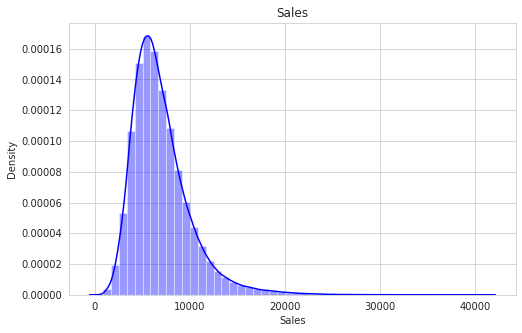

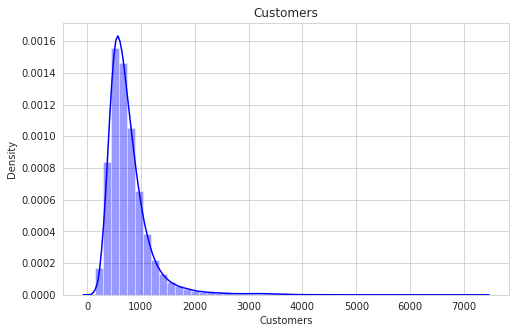

In [38]:
for feature in cont_num:
    plt.figure(figsize = (8,5))
    sns.set_style("whitegrid")
    sns.distplot(rossman_store[feature], hist = True,color='b')
    plt.title(feature)
    plt.show()

Here we can see that both the graphs are left skewed or positively skewed data So we can use tranformation to decrease the skewness 

## **Transformation**

---
Below are the some type of method or way to deal above type of problem.

**square-root for moderate skew:** sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

**log for greater skew:** log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

**inverse for severe skew:** 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

**Linearity and heteroscedasticity:** First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

There are values of Sales which are equal to 0. So the basic resolution is to subtract it with the min-1 value or else we will get at error if we use log transformation as log0 is equal to infinity. We can also use sqrt transformation instead

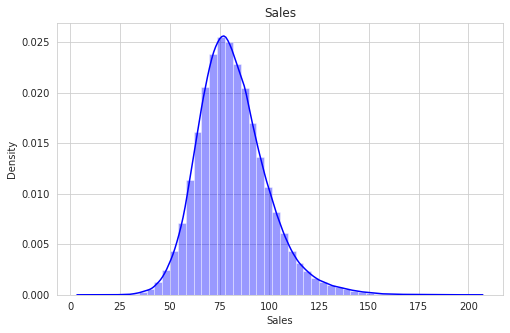

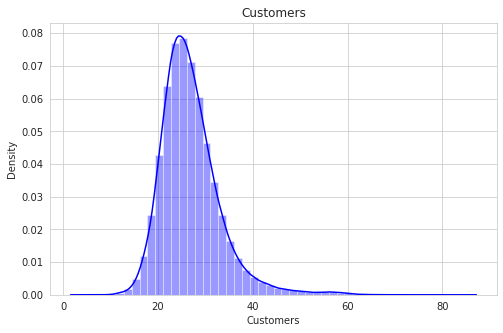

In [39]:
for feature in cont_num:
    plt.figure(figsize = (8,5))
    sns.set_style("whitegrid")
    sns.distplot(np.sqrt(rossman_store[feature]), hist = True,color='b')
    plt.title(feature)
    plt.show()



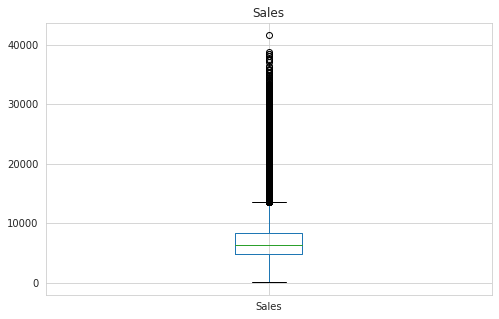

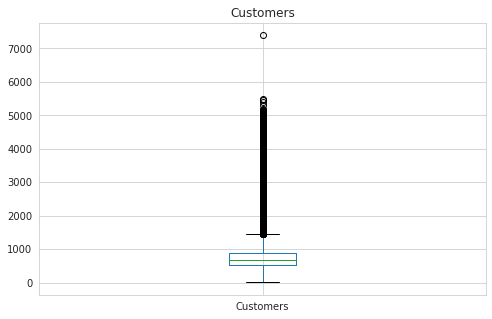

In [40]:
for feature in cont_num:
    plt.figure(figsize = (8,5))
    sns.set_style("whitegrid")
    rossman_store.boxplot(column = feature)
    plt.title(feature)
    plt.show()

In [41]:
rossman_store[rossman_store['Sales']>40000]

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2
44393,909,1,2015-06-22,41551,1721,0,0,0,a,c,1680.0,1


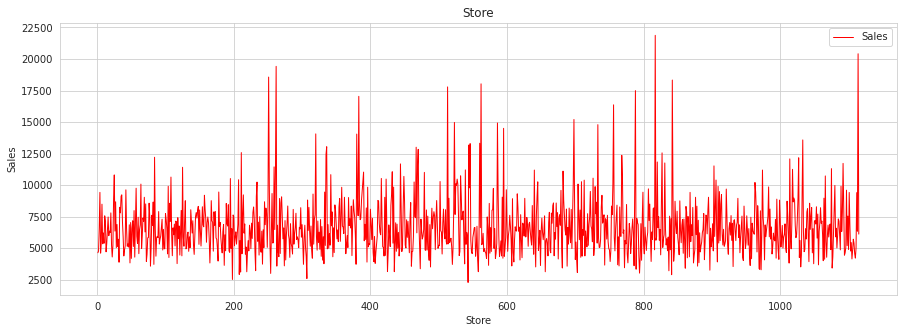

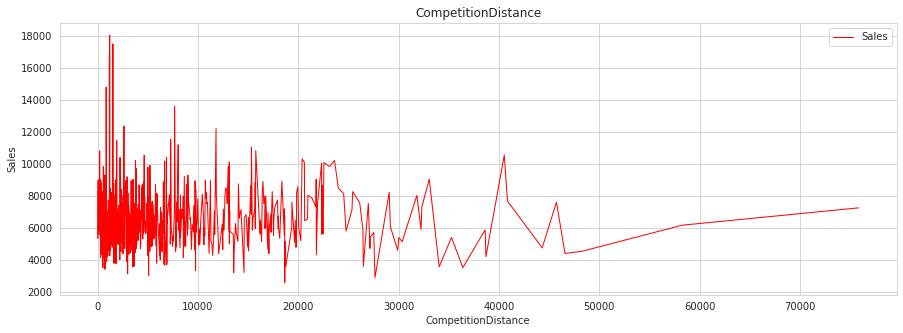

In [42]:
for feature in disc_num:
    if feature in ['Store','CompetitionDistance']:
        sns.set_style("whitegrid")
        rossman_store.pivot_table('Sales', index= feature, aggfunc='median').plot(lw = 1, figsize = (15,5),color="red")
        plt.title(feature)
        plt.ylabel("Sales")

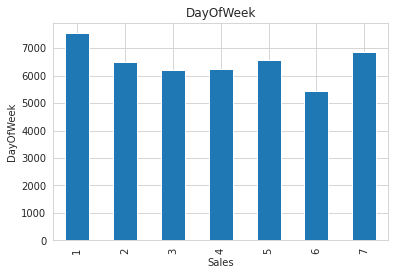

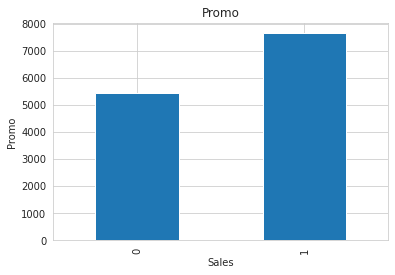

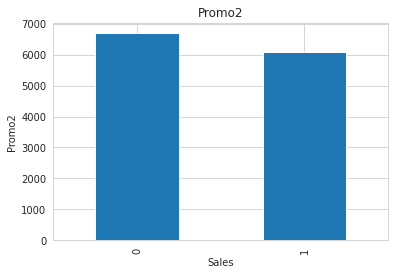

In [43]:
for feature in disc_num:
    if feature not in ['Store','CompetitionDistance']:
        plt.figure()
        rossman_store.groupby(feature)['Sales'].median().plot(kind='bar',figsize = (6,4))
        plt.title(feature)
        plt.xlabel('Sales')
        plt.ylabel(feature)
        plt.show()

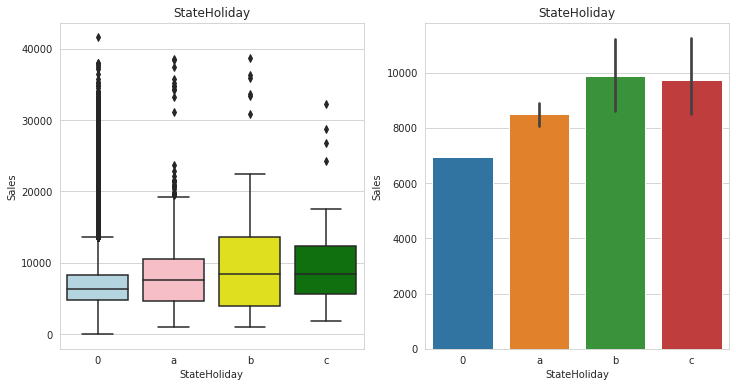

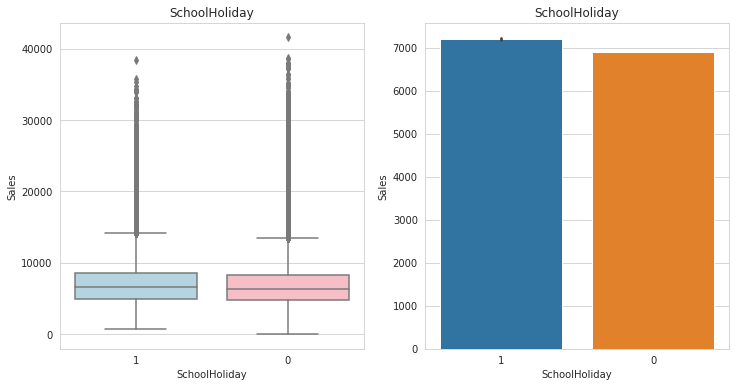

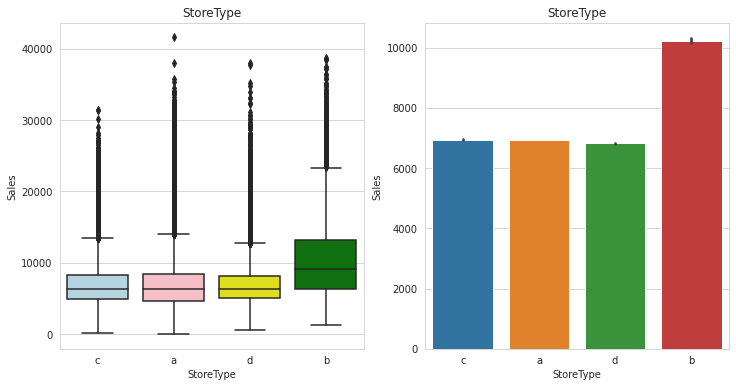

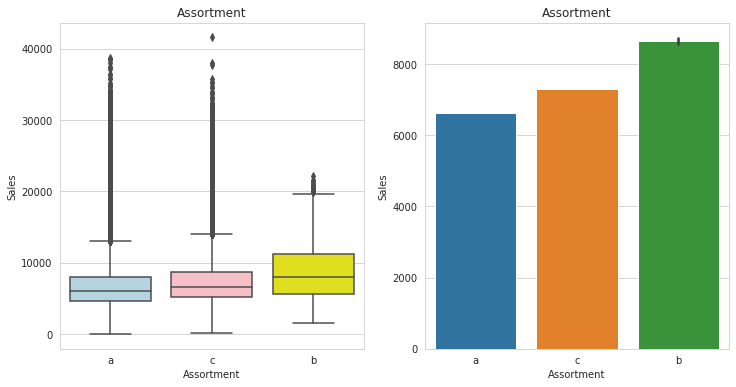

In [44]:
  # adds jitter to the data points - can be adjusted
for feature in categorical_feat:
    plt.figure(figsize = (12,6))
    plt.subplot(1, 2, 1) 
    sns.boxplot(feature, 'Sales', data = rossman_store,dodge='true', palette = ['lightblue','lightpink','yellow','green'])
    plt.title(feature)
    plt.ylabel("Sales")
    plt.subplot(1, 2, 2)
    sns.barplot(feature, 'Sales', data = rossman_store)
    plt.title(feature)
    plt.ylabel("Sales")

In [45]:
len(rossman_store[rossman_store.duplicated()])

0

In [46]:
rossman_store.dtypes

Store                           int64
DayOfWeek                       int64
Date                   datetime64[ns]
Sales                           int64
Customers                       int64
Promo                           int64
StateHoliday                   object
SchoolHoliday                  object
StoreType                      object
Assortment                     object
CompetitionDistance           float64
Promo2                          int64
dtype: object

In [47]:
rossman_store['Year'] = pd.DatetimeIndex(rossman_store['Date']).year
rossman_store['Month'] = pd.DatetimeIndex(rossman_store['Date']).month
rossman_store['Day'] =pd.DatetimeIndex(rossman_store['Date']).day
rossman_store=rossman_store.reset_index()

In [48]:
rossman_store=rossman_store.drop('Date',axis=1)

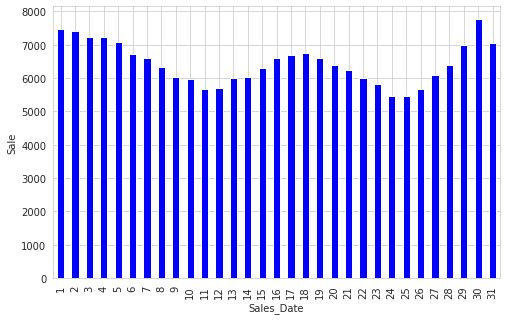

In [49]:
plt.figure(figsize = (8,5))
rossman_store.groupby('Day')['Sales'].median().plot(kind = 'bar', color = 'blue')
plt.xlabel("Sales_Date")
plt.ylabel("Sale")
plt.show()

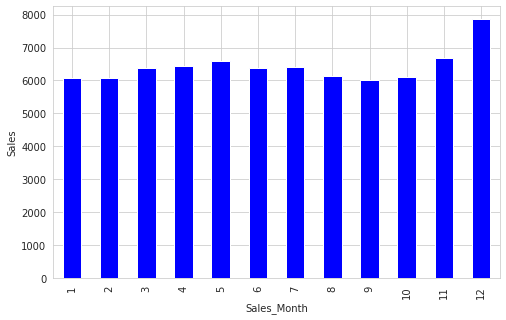

In [50]:
plt.figure(figsize = (8,5))
rossman_store.groupby('Month')['Sales'].median().plot(kind = 'bar', color = 'blue')
plt.xlabel("Sales_Month")
plt.ylabel("Sales")
plt.show()

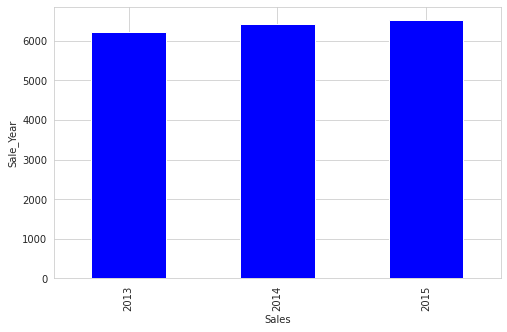

In [51]:
plt.figure(figsize = (8,5))
rossman_store.groupby('Year')['Sales'].median().plot(kind = 'bar', color = 'blue')
plt.xlabel("Sales")
plt.ylabel("Sale_Year")
plt.show()

In [52]:
rossman_store=rossman_store.drop("index",axis=1)

In [53]:
def factor_to_integer(df, colname, start_value=0):
    while df[colname].dtype == object:
        myval = start_value 
        for sval in df[colname].unique():
            df.loc[df[colname] == sval, colname] = myval
            myval += 1
        df[colname] = df[colname].astype(int, copy=False)
    print('levels :', df[colname].unique(), '; data type :', df[colname].dtype)

In [54]:
rossman_store.dtypes

Store                    int64
DayOfWeek                int64
Sales                    int64
Customers                int64
Promo                    int64
StateHoliday            object
SchoolHoliday           object
StoreType               object
Assortment              object
CompetitionDistance    float64
Promo2                   int64
Year                     int64
Month                    int64
Day                      int64
dtype: object

In [55]:
factor_to_integer(rossman_store, 'SchoolHoliday')
factor_to_integer(rossman_store, 'StateHoliday')
factor_to_integer(rossman_store, 'Assortment')
factor_to_integer(rossman_store, 'StoreType')

levels : [0 1] ; data type : int64
levels : [0 1 2 3] ; data type : int64
levels : [0 1 2] ; data type : int64
levels : [0 1 2 3] ; data type : int64


In [56]:
rossman_store['CompetitionDistance']=rossman_store['CompetitionDistance'].astype(int)

Text(0.5, 1.0, 'Correlation Map')

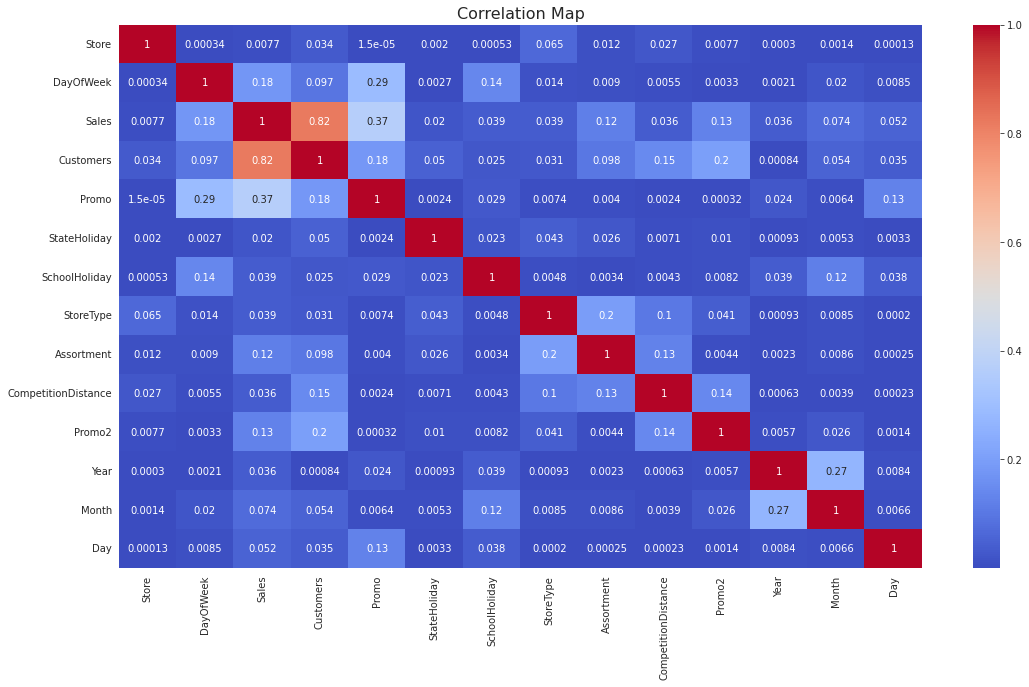

In [57]:
plt.figure(figsize=(18,10))
correlation = rossman_store.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')
plt.title("Correlation Map", fontsize=16)

In [58]:
X = rossman_store.drop('Sales', axis = 1)
y = rossman_store['Sales']


In [59]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [60]:
calc_vif(rossman_store[[i for i in rossman_store.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,4.037901
1,DayOfWeek,5.769044
2,Customers,5.301448
3,Promo,2.063542
4,StateHoliday,1.006225
5,SchoolHoliday,5.353385
6,StoreType,4.352654
7,Assortment,2.005006
8,CompetitionDistance,1.621209
9,Promo2,2.162712


In [61]:
calc_vif(rossman_store[[i for i in rossman_store.describe().columns if i not in ['Sales','Year']]])

,variables,VIF
0,Store,3.641583
1,DayOfWeek,4.830927
2,Customers,4.514479
3,Promo,1.931475
4,StateHoliday,1.005884
5,SchoolHoliday,4.645174
6,StoreType,3.968374
7,Assortment,2.003673
8,CompetitionDistance,1.566229
9,Promo2,2.008284


In [62]:
X = X.drop(['Year'], axis = 1)
y = rossman_store[['Sales']]  

In [63]:
rossman_store.shape

(844338, 14)

In [64]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 844338 entries, 0 to 844337
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   Store                844338 non-null  int64
 1   DayOfWeek            844338 non-null  int64
 2   Customers            844338 non-null  int64
 3   Promo                844338 non-null  int64
 4   StateHoliday         844338 non-null  int64
 5   SchoolHoliday        844338 non-null  int64
 6   StoreType            844338 non-null  int64
 7   Assortment           844338 non-null  int64
 8   CompetitionDistance  844338 non-null  int64
 9   Promo2               844338 non-null  int64
 10  Month                844338 non-null  int64
 11  Day                  844338 non-null  int64
dtypes: int64(12)
memory usage: 77.3 MB


In [65]:
# Data transformation
from scipy.stats import zscore
X = X.apply(zscore)
y = np.log10(y)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)

(675470, 12)
(168868, 12)


In [67]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)

In [68]:

reg.score(X_train,y_train)

0.6638324607023631

In [69]:
reg.coef_

array([[-0.00343479, -0.00910403,  0.13334873,  0.04772372, -0.00561439,
        -0.00183887,  0.01036927,  0.00775799,  0.01295732,  0.00685361,
         0.00563021, -0.0001768 ]])

In [70]:
reg.intercept_

array([3.80349922])

In [71]:
round(reg.score(X_test,y_test), 4)

0.6617

In [72]:
y_pred = reg.predict(X_test)
y_pred

array([[3.70897792],
       [3.97505532],
       [3.89656734],
       ...,
       [3.56749862],
       [3.64079382],
       [3.64069263]])

In [73]:
np.array(y_test)

array([[3.83199768],
       [4.06389604],
       [4.07346173],
       ...,
       [3.411788  ],
       [3.5748412 ],
       [3.54900326]])

In [74]:
print("MSE :",round(mean_squared_error(10**y_test,10** y_pred), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(10**y_test,10**y_pred)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred),4))
print("R2 :",round(r2_score(y_test, y_pred), 4))
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 17681591.8846
RMSE : 4204.9485
MAE : 0.0793
R2 : 0.6617
Adjusted R2 :  0.6616696628443555


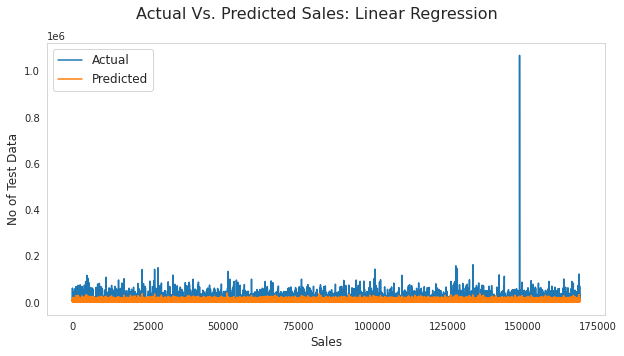

In [75]:
# Actual Price vs. Predicted Price for Linear Regression Plot
plt.figure(figsize=(10,5))
plt.plot(10**(y_pred))
plt.plot(np.array(10**(y_test)))
plt.suptitle('Actual Vs. Predicted Sales: Linear Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.ylabel('No of Test Data', fontsize=12)
plt.xlabel('Sales', fontsize=12)
plt.grid()

In [76]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.001 , max_iter= 3000)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, max_iter=3000)

In [77]:
round(lasso.score(X_train,y_train),4)

0.6635

In [78]:
lasso.coef_

array([-0.00245866, -0.00850573,  0.13205827,  0.04716502, -0.00446164,
       -0.00102074,  0.009627  ,  0.00714994,  0.01173395,  0.00542998,
        0.00476621, -0.        ])

In [79]:
y_pred_lasso = lasso.predict(X_test)

In [80]:
y_pred_lasso

array([3.7083491 , 3.97268677, 3.8919123 , ..., 3.57408572, 3.64202475,
       3.63844079])

In [81]:
np.array(y_test)

array([[3.83199768],
       [4.06389604],
       [4.07346173],
       ...,
       [3.411788  ],
       [3.5748412 ],
       [3.54900326]])

In [82]:
# Test Performance of lasso regression model
print("MSE :",round(mean_squared_error(10**y_test, 10**y_pred_lasso), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(10**y_test, 10**y_pred_lasso)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso),4))
print("R2 :",round(r2_score(y_test, y_pred_lasso), 4))

MSE : 16661714.3958
RMSE : 4081.8763
MAE : 0.0795
R2 : 0.6614


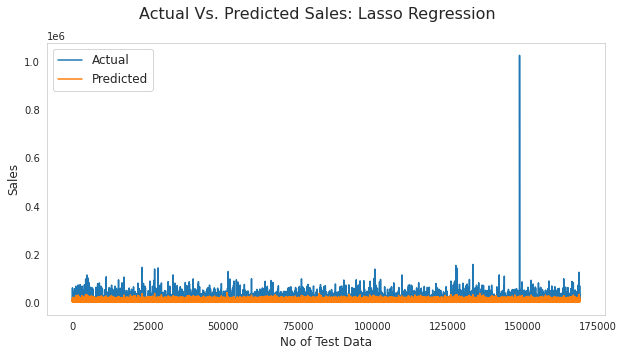

In [83]:
# Actual Price vs. Predicted Price for Lasso Regression Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(y_pred_lasso))
plt.plot((np.array(10**y_test)))
plt.suptitle('Actual Vs. Predicted Sales: Lasso Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid()

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
lasso_cv = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_model_cv = GridSearchCV(lasso_cv, parameters,scoring = 'neg_mean_squared_error', cv = 5, return_train_score=True)

In [86]:
lasso_model_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [87]:
print("The best fit alpha value is found out to be :" ,lasso_model_cv.best_params_['alpha'])
print("The negative mean squared error for is: ", round(lasso_model_cv.best_score_,4))

The best fit alpha value is found out to be : 1e-08
The negative mean squared error for is:  -0.0115


In [88]:
y_pred_lasso_cv = lasso_model_cv.predict(X_test)

In [89]:
y_pred_lasso_cv

array([3.70897791, 3.97505529, 3.89656728, ..., 3.56749867, 3.64079384,
       3.6406926 ])

In [90]:
np.array(y_test)

array([[3.83199768],
       [4.06389604],
       [4.07346173],
       ...,
       [3.411788  ],
       [3.5748412 ],
       [3.54900326]])

In [91]:
# Test Performance of lasso regression model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_lasso_cv), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_lasso_cv)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_lasso_cv),4))
print("R2 :",round(r2_score(y_test, y_pred_lasso_cv), 4))

MSE : 0.0116
RMSE : 0.1076
MAE : 0.0793
R2 : 0.6617


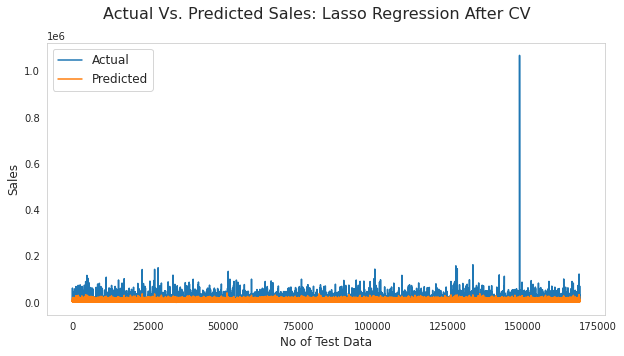

In [92]:
plt.figure(figsize=(10,5))
plt.plot(10**(y_pred_lasso_cv))
plt.plot((np.array(10**y_test)))

plt.suptitle('Actual Vs. Predicted Sales: Lasso Regression After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid()

In [93]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.01)
ridge_reg_model = ridge_reg.fit(X_train,y_train)

In [94]:
round(ridge_reg.score(X_train,y_train),4)

0.6638

In [95]:
#prediction of test data.
y_pred_ridge = ridge_reg.predict(X_test)

In [96]:
y_pred_ridge

array([[3.70897792],
       [3.97505531],
       [3.89656733],
       ...,
       [3.56749862],
       [3.64079382],
       [3.64069263]])

In [97]:
np.array(y_test)

array([[3.83199768],
       [4.06389604],
       [4.07346173],
       ...,
       [3.411788  ],
       [3.5748412 ],
       [3.54900326]])

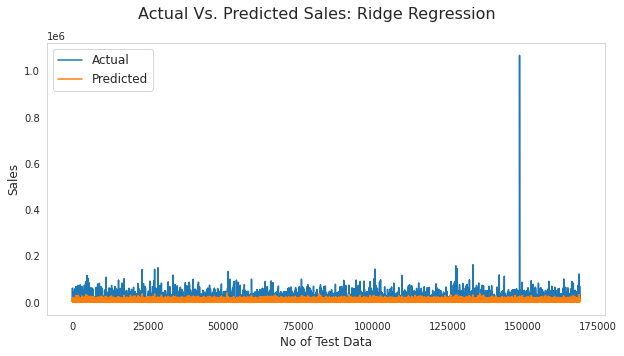

In [98]:
# Actual Price vs. Predicted Price for Ridge Regression Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(y_pred_ridge))
plt.plot((np.array(10**y_test)))

plt.suptitle('Actual Vs. Predicted Sales: Ridge Regression', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid()

In [99]:
# Hyper-Parameter Tuning for Lasso Regression

ridge_cv = Ridge()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_model_cv = GridSearchCV(ridge_cv, parameters,scoring = 'r2',cv = 5)

In [100]:
ridge_model_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [101]:
print("The best fit alpha value is found out to be :" ,ridge_model_cv.best_params_['alpha'])
print("The negative mean squared error for is: ", round(ridge_model_cv.best_score_,3))

The best fit alpha value is found out to be : 40
The negative mean squared error for is:  0.664


In [102]:
#prediction of test data.
y_pred_ridge_cv = ridge_model_cv.predict(X_test)

In [103]:
y_pred_ridge_cv

array([[3.70898043],
       [3.97504106],
       [3.89656205],
       ...,
       [3.56751225],
       [3.64080081],
       [3.64070175]])

In [104]:
np.array(y_test)

array([[3.83199768],
       [4.06389604],
       [4.07346173],
       ...,
       [3.411788  ],
       [3.5748412 ],
       [3.54900326]])

In [105]:
# Test Performance of ridge regression model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_ridge_cv), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_ridge_cv)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_ridge_cv),4))
print("R2 :",round(r2_score(y_test, y_pred_ridge_cv), 4))

MSE : 0.0116
RMSE : 0.1076
MAE : 0.0793
R2 : 0.6617


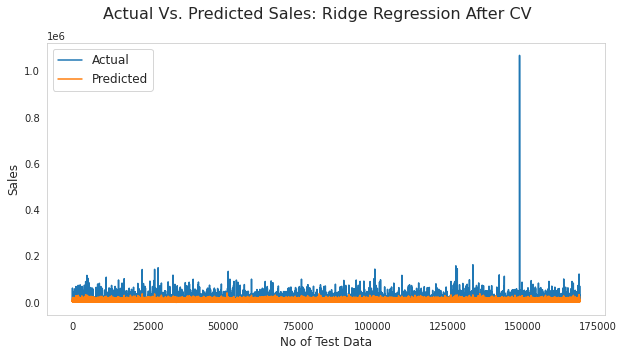

In [106]:
# Actual Price vs. Predicted Price for Ridge Regression after Validation Plotting 
plt.figure(figsize=(10,5))
plt.plot(10**(y_pred_ridge_cv))
plt.plot(10**(np.array(y_test)))

plt.suptitle('Actual Vs. Predicted Sales: Ridge Regression After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid()

In [107]:
#fit data into Elastic Net
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.01,l1_ratio=0.5)
elastic_model = elastic.fit(X_train,y_train)

In [108]:
#accuracy of lasso regression model
elastic.score(X_train,y_train)

0.6568941856316726

In [109]:
#prediction of test data.
y_pred_elastic = elastic.predict(X_test)

In [110]:
np.array(y_pred)


array([[3.70897792],
       [3.97505532],
       [3.89656734],
       ...,
       [3.56749862],
       [3.64079382],
       [3.64069263]])

In [111]:
# Test Performance of Elastic Net model
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic),4))
print("R2 :",round(r2_score(y_test, y_pred_elastic), 4))

MSE : 0.0118
RMSE : 0.1087
MAE : 0.0811
R2 : 0.655


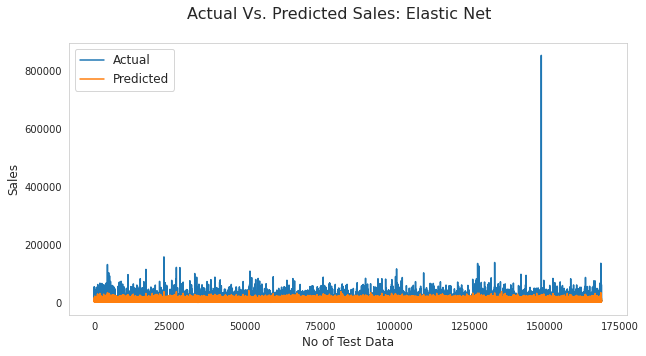

In [112]:
# Actual Price vs. Predicted Price for Elastic Net Plotting
plt.figure(figsize=(10,5))
plt.plot(10**(y_pred_elastic))
plt.plot(10**(np.array(y_test)))

plt.suptitle('Actual Vs. Predicted Sales: Elastic Net', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid()

In [113]:
elastic_cv = ElasticNet()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8,1,2]}
elastic_model_cv = GridSearchCV(elastic_cv,parameters,scoring='r2',cv=5)

In [114]:
elastic_model_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 2]},
             scoring='r2')

In [115]:
elastic_model_cv.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.4}

In [116]:
print("The best fit alpha and L1 ratio value is found out to be :" ,elastic_model_cv.best_params_['alpha'], elastic_model_cv.best_params_['l1_ratio'])
print("The negative mean squared error for is: ", round(elastic_model_cv.best_score_,3))

The best fit alpha and L1 ratio value is found out to be : 1e-05 0.4
The negative mean squared error for is:  0.664


In [117]:
#prediction of test and train data.
y_pred_elastic_cv = elastic_model_cv.predict(X_test)

In [118]:
y_pred_elastic_cv

array([3.70897555, 3.97504159, 3.89654523, ..., 3.5675237 , 3.64080272,
       3.64068346])

In [119]:
np.array(y_test)

array([[3.83199768],
       [4.06389604],
       [4.07346173],
       ...,
       [3.411788  ],
       [3.5748412 ],
       [3.54900326]])

In [120]:
# Test Performance of Elastic Net model after validation
print("MSE :",round(mean_squared_error(y_test, y_pred_elastic_cv), 4))
print("RMSE :",round(math.sqrt(mean_squared_error(y_test, y_pred_elastic_cv)),4))
print("MAE :",round(mean_absolute_error(y_test, y_pred_elastic_cv),4))

print("R2 :",round(r2_score(y_test, y_pred_elastic_cv), 4))

MSE : 0.0116
RMSE : 0.1076
MAE : 0.0793
R2 : 0.6617


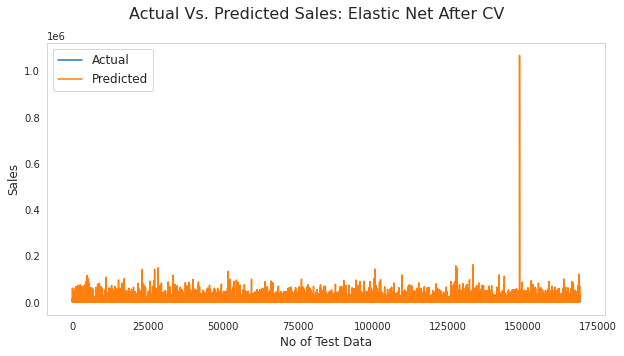

In [121]:
plt.figure(figsize=(10,5))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_elastic_cv))
plt.suptitle('Actual Vs. Predicted Sales: Elastic Net After CV', fontsize=16)
plt.legend(['Actual','Predicted'], fontsize=12)
plt.xlabel('No of Test Data', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid()

In [122]:
def compare_model(X_train, X_test, y_train, y_test, models):
  df_columns = []
  #Creating dataframe to store the train and test metrics for each of the models
  df=pd.DataFrame(columns=df_columns)

  i = 0
  #need to pass each model one by one
  for model in models:
    #fiting each model training dataset
    model.fit(X_train, y_train)
    #predicting y values for each model
    y_pred = model.predict(X_test)
    #getting accuracy score for each model
    accuracy = model.score(X_test, y_test)

    #getting all evaluation matrics for each model
    MSE = round(mean_squared_error(y_test, y_pred), 4)
    RMSE = round(math.sqrt(mean_squared_error(y_test, y_pred)),4)
    MAE = round(mean_absolute_error(y_test, y_pred),4)
    R2 = r2_score(y_test, y_pred)


    #getting all above into dataframe
    df.loc[i,"Model"] = model.__class__.__name__
    df.loc[i, "MSE"] = MSE
    df.loc[i, "RMSE"] = RMSE
    df.loc[i, "MAE"] = MAE
    df.loc[i, "R2"] = R2
  
    
    #to get values in next rows for next model
    i=i+1
 #Sorting values by accuracy
  df.sort_values(by=['R2'],ascending=False,inplace=True, ignore_index=True)
    
  return df



In [123]:
model = [reg, lasso, ridge_reg, elastic]

In [124]:
matrics_compare_df = compare_model(X_train, X_test, y_train, y_test, model)
matrics_compare_df.sort_values(by=['R2'],ascending=True,inplace=True)
matrics_compare_df

,Model,MSE,RMSE,MAE,R2
3,ElasticNet,0.0118,0.1087,0.0811,0.654952
2,Lasso,0.0116,0.1076,0.0795,0.661436
1,LinearRegression,0.0116,0.1076,0.0793,0.661694
0,Ridge,0.0116,0.1076,0.0793,0.661694
